In [1]:
import pandas as pd
import numpy as np
import os

import math

import src.visualization.simple_visualization as sv
import src.features.feature_engineering_1 as feng

In [2]:
# Récupération des données
years = ['2016', '2017', '2018', '2019']

df = feng.get_all_season_data(years)
df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,last_event_type,last_event_x,last_event_y,time_since_last_event,distance_from_last_event
0,1,REGULAR,01:11,2016020001,10,Toronto Maple Leafs,Shot,Mitchell Marner,Craig Anderson,Wrist Shot,-77.0,5.0,NaN,NaN,Blocked Shot,-61.0,11.0,1,17.088007
1,1,REGULAR,02:53,2016020001,9,Ottawa Senators,Shot,Chris Kelly,Frederik Andersen,Wrist Shot,86.0,13.0,NaN,NaN,Giveaway,54.0,-5.0,5,36.715120
2,1,REGULAR,04:01,2016020001,9,Ottawa Senators,Shot,Cody Ceci,Frederik Andersen,Wrist Shot,23.0,-38.0,NaN,NaN,Missed Shot,-72.0,0.0,18,102.318131
3,1,REGULAR,04:46,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,33.0,-15.0,NaN,NaN,Missed Shot,77.0,-2.0,19,45.880279
4,1,REGULAR,06:46,2016020001,10,Toronto Maple Leafs,Shot,Martin Marincin,Craig Anderson,Wrist Shot,-34.0,28.0,NaN,NaN,Hit,47.0,34.0,16,81.221918


$$ \underline{\textbf{QUESTION 1 :}} $$

$$ \textbf{Ajout des caractéristiques :} $$

In [3]:
df = feng.add_new_features(df)
df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,...,strength,last_event_type,last_event_x,last_event_y,time_since_last_event,distance_from_last_event,distance_to_net,shot_angle,is_goal,is_empty_net
0,1,REGULAR,01:11,2016020001,10,Toronto Maple Leafs,Shot,Mitchell Marner,Craig Anderson,Wrist Shot,...,NaN,Blocked Shot,-61.0,11.0,1,17.088007,13.0,23.0,0,0
1,1,REGULAR,02:53,2016020001,9,Ottawa Senators,Shot,Chris Kelly,Frederik Andersen,Wrist Shot,...,NaN,Giveaway,54.0,-5.0,5,36.715120,13.0,77.0,0,0
2,1,REGULAR,04:01,2016020001,9,Ottawa Senators,Shot,Cody Ceci,Frederik Andersen,Wrist Shot,...,NaN,Missed Shot,-72.0,0.0,18,102.318131,76.0,-30.0,0,0
3,1,REGULAR,04:46,2016020001,9,Ottawa Senators,Shot,Erik Karlsson,Frederik Andersen,Slap Shot,...,NaN,Missed Shot,77.0,-2.0,19,45.880279,58.0,-15.0,0,0
4,1,REGULAR,06:46,2016020001,10,Toronto Maple Leafs,Shot,Martin Marincin,Craig Anderson,Wrist Shot,...,NaN,Hit,47.0,34.0,16,81.221918,62.0,27.0,0,0


$$ \textbf{Histogrammes} $$ 

$$ \text{Pour la distance de tir :} $$

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "darkgrid")

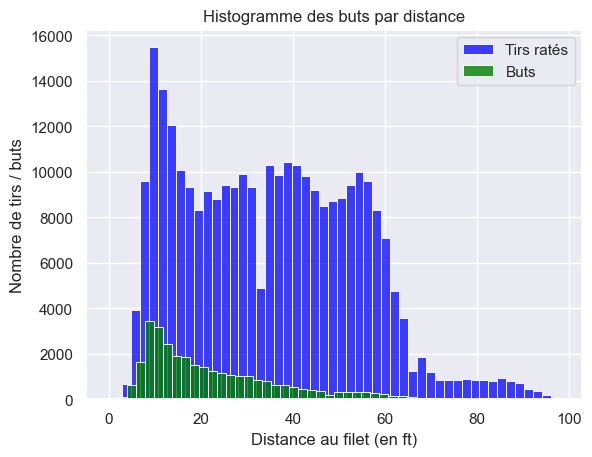

In [5]:
# Histogramme pour les buts
sns.histplot(df[df['is_goal'] == 0], color = 'blue', x = 'distance_to_net', bins = 50, label= 'Tirs ratés')
sns.histplot(df[df['is_goal'] == 1], alpha = 0.8, color = 'green', x = 'distance_to_net', bins = 50, label = 'Buts')
plt.title('Histogramme des buts par distance')
plt.xlabel('Distance au filet (en ft)')
plt.ylabel('Nombre de tirs / buts')
plt.legend()
plt.show()

$\textbf{Observations :}$ 

On remarque que le nombre de tirs est plus important à faible distance (moins de 20ft). C'est aussi sur cet intervalle de distance qu'il y a le plus de buts : Ceci est cohérent étant donné qu'il est plus facile de marquer à faible distance.

De 20 à 60 ft, le nombre de tirs est globalement le même mais le nombre de buts diminue de manière régulière, ce qui est normal étant donné qu'il est devient plus difficile de marquer lorsqu'on s'éloigne de la cage. Ceci explique aussi le faible nombre de tirs tentés au-delà de 60 ft.

$$\text{Pour l'angle de tir :}$$

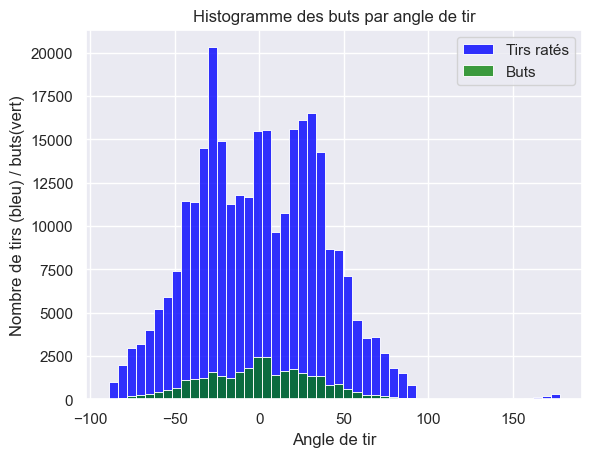

In [6]:
# Histogramme pour les buts
sns.histplot(df[df['is_goal'] == 0], color = 'blue', alpha = 0.8, x = 'shot_angle', bins = 50, label = 'Tirs ratés')
sns.histplot(df[df['is_goal'] == 1], color = 'green', x = 'shot_angle', bins = 50, label = 'Buts')
plt.xlabel('Angle de tir')
plt.ylabel('Nombre de tirs (bleu) / buts(vert)')
plt.title('Histogramme des buts par angle de tir')
plt.legend()
plt.show()

$ \textbf{Observations :} $

Dans un premier temps, on remarque une allure relativement proche des histogrammes pour les intervalles [-90,0] et [0,90]. 

On remarque aussi qu'il y a plus de buts lorsque l'angle de tir est faible : Ceci est cohérent étant donné que marquer en tirant dans l'axe du filet est plus "facile", et il devient plus difficile de marquer lorsqu'on s'éloigne de cet axe.

On retrouve aussi des valeurs aberrantes dans cet histogramme (Angle de tir > 90°). Ceci correspond à des tirs de type 'Wrap Around' (https://www.youtube.com/watch?v=tmRibUXW8RE) qui sont rares et difficile à marquer. Ces valeurs peuvent être éliminées de notre dataset.

In [7]:
# Elimination des valeurs aberrantes pour 'shot_angle'
df = df[(df['shot_angle'] < 90) & (df['shot_angle'] > -90)]

$$ \text{Histogramme avec la distance et l'angle de tir} $$

Text(34.875, 0.5, 'Angle de tir')

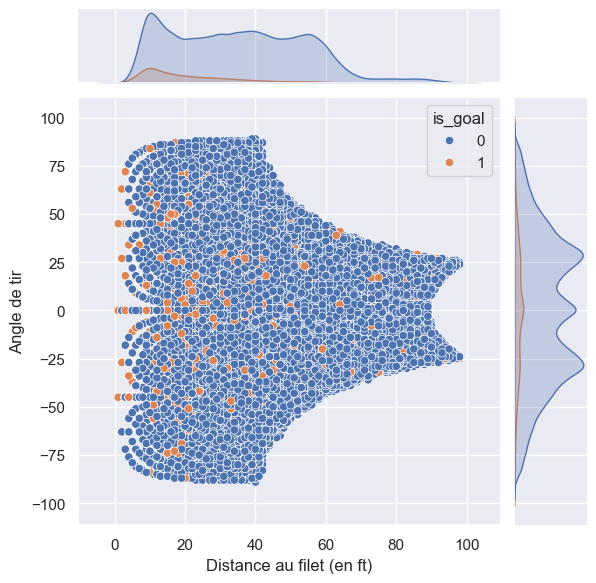

In [8]:
sns.jointplot(data = df, x = 'distance_to_net', y = 'shot_angle', hue ='is_goal')
plt.xlabel('Distance au filet (en ft)')
plt.ylabel('Angle de tir')


$$ \underline{\textbf{QUESTION 2 :}} $$

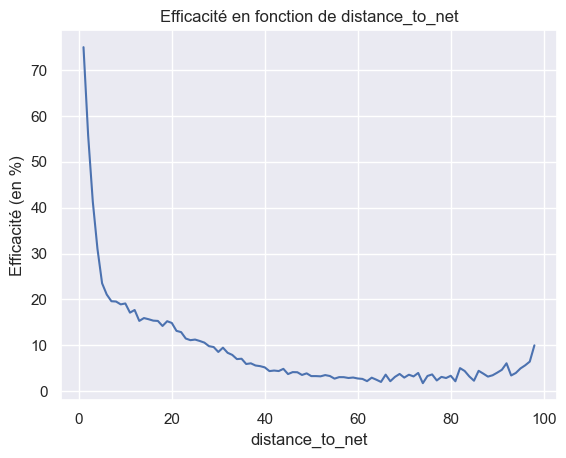

In [9]:
feng.plot_efficiency_curve(df, 'distance_to_net')

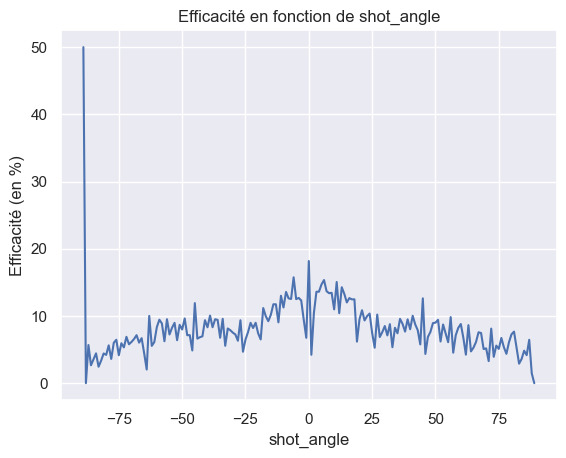

In [10]:
feng.plot_efficiency_curve(df, 'shot_angle')

$\textbf{Observations :}$ 

On remarque que l'efficacité diminue lorsque l'on s'éloigne de la cage, et lorsqu'on s'éloigne de son axe (lorsque l'angle de tir augmente). Cette courbe vient confirmer les observations que nous avons faite à partir des histogrammes.  

$$ \underline{\textbf{QUESTION 3 :}} $$ 

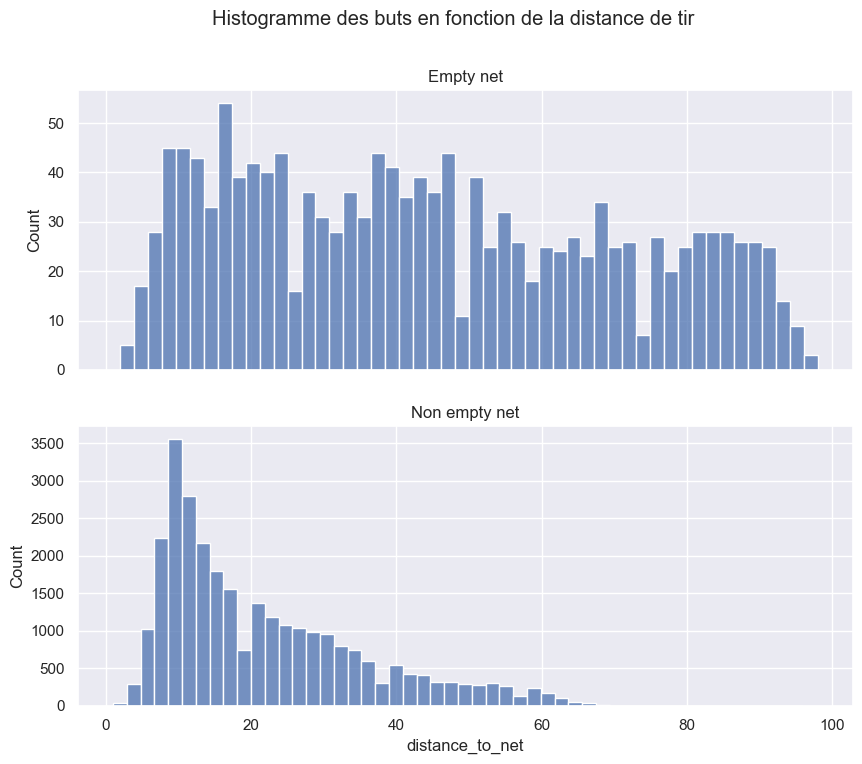

In [11]:
feng.hist_for_goals(df)